In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_alex_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                96, (11, 11), strides=(4, 4), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(256, (5, 5), activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(256, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [7]:
alex_net_wrapper = ModelWrapper("AlexNet", preprocessing_utils=preprocessing_utils)

In [8]:
alex_net_wrapper.build_model(build_fn=build_alex_net, model_name=alex_net_wrapper.model_name)

Building model...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                         

In [9]:
alex_net_wrapper.train_and_save_model_and_history()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 48.9646 - accuracy: 0.0688
Epoch 1: val_loss improved from inf to 33.22534, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 15s 516ms/step - loss: 48.9646 - accuracy: 0.0688 - val_loss: 33.2253 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 2/100
8/9 [=========================>....] - ETA: 0s - loss: 25.6175 - accuracy: 0.0780
Epoch 2: val_loss improved from 33.22534 to 17.12112, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 331ms/step - loss: 25.4173 - accuracy: 0.0788 - val_loss: 17.1211 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 3/100
8/9 [=========================>....] - ETA: 0s - loss: 13.9239 - accuracy: 0.0852
Epoch 3: val_loss improved from 17.12112 to 10.47826, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 299ms/step - loss: 13.8426 - accuracy: 0.0847 - val_loss: 10.4783 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 4/100
8/9 [=========================>....] - ETA: 0s - loss: 9.1262 - accuracy: 0.0962
Epoch 4: val_loss improved from 10.47826 to 7.76280, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 310ms/step - loss: 9.0930 - accuracy: 0.0954 - val_loss: 7.7628 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 5/100
8/9 [=========================>....] - ETA: 0s - loss: 7.0305 - accuracy: 0.1023
Epoch 5: val_loss improved from 7.76280 to 6.26677, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 303ms/step - loss: 7.0120 - accuracy: 0.1027 - val_loss: 6.2668 - val_accuracy: 0.0783 - lr: 0.0010
Epoch 6/100
8/9 [=========================>....] - ETA: 0s - loss: 5.7563 - accuracy: 0.1085
Epoch 6: val_loss improved from 6.26677 to 5.32392, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 316ms/step - loss: 5.7409 - accuracy: 0.1095 - val_loss: 5.3239 - val_accuracy: 0.0691 - lr: 0.0010
Epoch 7/100
8/9 [=========================>....] - ETA: 0s - loss: 4.9149 - accuracy: 0.1318
Epoch 7: val_loss improved from 5.32392 to 4.73304, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 332ms/step - loss: 4.9075 - accuracy: 0.1328 - val_loss: 4.7330 - val_accuracy: 0.0783 - lr: 0.0010
Epoch 8/100
8/9 [=========================>....] - ETA: 0s - loss: 4.3882 - accuracy: 0.1552
Epoch 8: val_loss improved from 4.73304 to 4.32158, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 317ms/step - loss: 4.3857 - accuracy: 0.1547 - val_loss: 4.3216 - val_accuracy: 0.0829 - lr: 0.0010
Epoch 9/100
8/9 [=========================>....] - ETA: 0s - loss: 4.0154 - accuracy: 0.1612
Epoch 9: val_loss improved from 4.32158 to 4.03710, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 345ms/step - loss: 4.0140 - accuracy: 0.1598 - val_loss: 4.0371 - val_accuracy: 0.0876 - lr: 0.0010
Epoch 10/100
8/9 [=========================>....] - ETA: 0s - loss: 3.7297 - accuracy: 0.1682
Epoch 10: val_loss improved from 4.03710 to 3.91402, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 288ms/step - loss: 3.7274 - accuracy: 0.1693 - val_loss: 3.9140 - val_accuracy: 0.0876 - lr: 0.0010
Epoch 11/100
8/9 [=========================>....] - ETA: 0s - loss: 3.5623 - accuracy: 0.1762
Epoch 11: val_loss improved from 3.91402 to 3.63318, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 301ms/step - loss: 3.5590 - accuracy: 0.1764 - val_loss: 3.6332 - val_accuracy: 0.1152 - lr: 0.0010
Epoch 12/100
8/9 [=========================>....] - ETA: 0s - loss: 3.3857 - accuracy: 0.1865
Epoch 12: val_loss did not improve from 3.63318
9/9 [==============================] - 1s 147ms/step - loss: 3.3826 - accuracy: 0.1880 - val_loss: 3.6893 - val_accuracy: 0.0876 - lr: 0.0010
Epoch 13/100
9/9 [==============================] - ETA: 0s - loss: 3.2587 - accuracy: 0.1931
Epoch 13: val_loss improved from 3.63318 to 3.48895, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 388ms/step - loss: 3.2587 - accuracy: 0.1931 - val_loss: 3.4890 - val_accuracy: 0.1336 - lr: 0.0010
Epoch 14/100
8/9 [=========================>....] - ETA: 0s - loss: 3.1299 - accuracy: 0.2150
Epoch 14: val_loss improved from 3.48895 to 3.36351, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 304ms/step - loss: 3.1271 - accuracy: 0.2172 - val_loss: 3.3635 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 15/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0579 - accuracy: 0.2245
Epoch 15: val_loss improved from 3.36351 to 3.30512, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 318ms/step - loss: 3.0552 - accuracy: 0.2250 - val_loss: 3.3051 - val_accuracy: 0.1889 - lr: 0.0010
Epoch 16/100
8/9 [=========================>....] - ETA: 0s - loss: 2.9528 - accuracy: 0.2422
Epoch 16: val_loss did not improve from 3.30512
9/9 [==============================] - 1s 147ms/step - loss: 2.9536 - accuracy: 0.2423 - val_loss: 3.4143 - val_accuracy: 0.1475 - lr: 0.0010
Epoch 17/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8857 - accuracy: 0.2573
Epoch 17: val_loss did not improve from 3.30512
9/9 [==============================] - 1s 147ms/step - loss: 2.8866 - accuracy: 0.2569 - val_loss: 3.3410 - val_accuracy: 0.1336 - lr: 0.0010
Epoch 18/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8594 - accuracy: 0.2630
Epoch 18: val_loss did not improve from 3.30512
9/9 [==============================] - 1s 142ms/step - loss: 2.8577 - accuracy: 0.2639 - val_loss: 3.3413 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 288ms/step - loss: 2.7413 - accuracy: 0.2810 - val_loss: 3.2271 - val_accuracy: 0.1567 - lr: 5.0000e-04
Epoch 20/100
8/9 [=========================>....] - ETA: 0s - loss: 2.6017 - accuracy: 0.3090
Epoch 20: val_loss did not improve from 3.22713
9/9 [==============================] - 1s 143ms/step - loss: 2.6009 - accuracy: 0.3094 - val_loss: 3.2709 - val_accuracy: 0.1567 - lr: 5.0000e-04
Epoch 21/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5233 - accuracy: 0.3383
Epoch 21: val_loss improved from 3.22713 to 3.12388, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 311ms/step - loss: 2.5202 - accuracy: 0.3384 - val_loss: 3.1239 - val_accuracy: 0.1475 - lr: 5.0000e-04
Epoch 22/100
8/9 [=========================>....] - ETA: 0s - loss: 2.4912 - accuracy: 0.3325
Epoch 22: val_loss did not improve from 3.12388
9/9 [==============================] - 1s 142ms/step - loss: 2.4945 - accuracy: 0.3313 - val_loss: 3.3785 - val_accuracy: 0.1244 - lr: 5.0000e-04
Epoch 23/100
8/9 [=========================>....] - ETA: 0s - loss: 2.3721 - accuracy: 0.3627
Epoch 23: val_loss did not improve from 3.12388
9/9 [==============================] - 1s 143ms/step - loss: 2.3722 - accuracy: 0.3620 - val_loss: 3.7078 - val_accuracy: 0.1106 - lr: 5.0000e-04
Epoch 24/100
8/9 [=========================>....] - ETA: 0s - loss: 2.3139 - accuracy: 0.3792
Epoch 24: val_loss did not improve from 3.12388
9/9 [==============================] - 1s 141ms/step - loss: 2.3164 - accuracy: 0.3785 - val_loss: 3.1847 - val_accuracy: 0.1889 - lr: 5

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 285ms/step - loss: 1.6188 - accuracy: 0.5806 - val_loss: 3.1076 - val_accuracy: 0.2581 - lr: 1.5625e-05
Epoch 40/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5967 - accuracy: 0.5970
Epoch 40: val_loss did not improve from 3.10761
9/9 [==============================] - 1s 142ms/step - loss: 1.5999 - accuracy: 0.5957 - val_loss: 3.1109 - val_accuracy: 0.2719 - lr: 1.5625e-05
Epoch 41/100
8/9 [=========================>....] - ETA: 0s - loss: 1.6046 - accuracy: 0.5888
Epoch 41: val_loss improved from 3.10761 to 3.03362, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 296ms/step - loss: 1.5983 - accuracy: 0.5906 - val_loss: 3.0336 - val_accuracy: 0.2673 - lr: 1.5625e-05
Epoch 42/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5948 - accuracy: 0.5968
Epoch 42: val_loss improved from 3.03362 to 3.01985, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 291ms/step - loss: 1.5897 - accuracy: 0.5982 - val_loss: 3.0198 - val_accuracy: 0.2765 - lr: 1.5625e-05
Epoch 43/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5775 - accuracy: 0.5985
Epoch 43: val_loss improved from 3.01985 to 2.97300, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 295ms/step - loss: 1.5825 - accuracy: 0.5969 - val_loss: 2.9730 - val_accuracy: 0.2811 - lr: 1.5625e-05
Epoch 44/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5750 - accuracy: 0.5985
Epoch 44: val_loss improved from 2.97300 to 2.93900, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 303ms/step - loss: 1.5764 - accuracy: 0.5982 - val_loss: 2.9390 - val_accuracy: 0.2719 - lr: 1.5625e-05
Epoch 45/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5668 - accuracy: 0.6010
Epoch 45: val_loss improved from 2.93900 to 2.92696, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 317ms/step - loss: 1.5664 - accuracy: 0.6006 - val_loss: 2.9270 - val_accuracy: 0.2811 - lr: 1.5625e-05
Epoch 46/100
9/9 [==============================] - ETA: 0s - loss: 1.5615 - accuracy: 0.5999
Epoch 46: val_loss improved from 2.92696 to 2.87145, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 6s 702ms/step - loss: 1.5615 - accuracy: 0.5999 - val_loss: 2.8714 - val_accuracy: 0.3041 - lr: 1.5625e-05
Epoch 47/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5528 - accuracy: 0.6083
Epoch 47: val_loss improved from 2.87145 to 2.86589, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 344ms/step - loss: 1.5546 - accuracy: 0.6074 - val_loss: 2.8659 - val_accuracy: 0.2949 - lr: 1.5625e-05
Epoch 48/100
9/9 [==============================] - ETA: 0s - loss: 1.5531 - accuracy: 0.6008
Epoch 48: val_loss improved from 2.86589 to 2.83623, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 369ms/step - loss: 1.5531 - accuracy: 0.6008 - val_loss: 2.8362 - val_accuracy: 0.3318 - lr: 1.5625e-05
Epoch 49/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5448 - accuracy: 0.6080
Epoch 49: val_loss improved from 2.83623 to 2.79205, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 288ms/step - loss: 1.5469 - accuracy: 0.6079 - val_loss: 2.7920 - val_accuracy: 0.3226 - lr: 1.5625e-05
Epoch 50/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5495 - accuracy: 0.6043
Epoch 50: val_loss improved from 2.79205 to 2.78082, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 1.5480 - accuracy: 0.6047 - val_loss: 2.7808 - val_accuracy: 0.3318 - lr: 1.5625e-05
Epoch 51/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5333 - accuracy: 0.6068
Epoch 51: val_loss improved from 2.78082 to 2.75616, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 304ms/step - loss: 1.5318 - accuracy: 0.6081 - val_loss: 2.7562 - val_accuracy: 0.3364 - lr: 1.5625e-05
Epoch 52/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5312 - accuracy: 0.6120
Epoch 52: val_loss improved from 2.75616 to 2.72157, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 318ms/step - loss: 1.5330 - accuracy: 0.6115 - val_loss: 2.7216 - val_accuracy: 0.3318 - lr: 1.5625e-05
Epoch 53/100
9/9 [==============================] - ETA: 0s - loss: 1.5200 - accuracy: 0.6191
Epoch 53: val_loss improved from 2.72157 to 2.71204, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 373ms/step - loss: 1.5200 - accuracy: 0.6191 - val_loss: 2.7120 - val_accuracy: 0.3364 - lr: 1.5625e-05
Epoch 54/100
9/9 [==============================] - ETA: 0s - loss: 1.5131 - accuracy: 0.6152
Epoch 54: val_loss did not improve from 2.71204
9/9 [==============================] - 2s 237ms/step - loss: 1.5131 - accuracy: 0.6152 - val_loss: 2.7158 - val_accuracy: 0.3364 - lr: 1.5625e-05
Epoch 55/100
9/9 [==============================] - ETA: 0s - loss: 1.5050 - accuracy: 0.6125
Epoch 55: val_loss improved from 2.71204 to 2.67610, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 359ms/step - loss: 1.5050 - accuracy: 0.6125 - val_loss: 2.6761 - val_accuracy: 0.3364 - lr: 1.5625e-05
Epoch 56/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4998 - accuracy: 0.6220
Epoch 56: val_loss improved from 2.67610 to 2.67062, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 330ms/step - loss: 1.4998 - accuracy: 0.6220 - val_loss: 2.6706 - val_accuracy: 0.3456 - lr: 1.5625e-05
Epoch 57/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4886 - accuracy: 0.6217
Epoch 57: val_loss did not improve from 2.67062
9/9 [==============================] - 1s 142ms/step - loss: 1.4941 - accuracy: 0.6203 - val_loss: 2.6749 - val_accuracy: 0.3364 - lr: 1.5625e-05
Epoch 58/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4872 - accuracy: 0.6195
Epoch 58: val_loss did not improve from 2.67062
9/9 [==============================] - 1s 142ms/step - loss: 1.4846 - accuracy: 0.6200 - val_loss: 2.6733 - val_accuracy: 0.3548 - lr: 1.5625e-05
Epoch 59/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4822 - accuracy: 0.6292
Epoch 59: val_loss improved from 2.67062 to 2.64832, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 297ms/step - loss: 1.4845 - accuracy: 0.6288 - val_loss: 2.6483 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 60/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4679 - accuracy: 0.6342
Epoch 60: val_loss improved from 2.64832 to 2.63775, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 307ms/step - loss: 1.4679 - accuracy: 0.6346 - val_loss: 2.6377 - val_accuracy: 0.3548 - lr: 1.5625e-05
Epoch 61/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4703 - accuracy: 0.6298
Epoch 61: val_loss did not improve from 2.63775
9/9 [==============================] - 1s 143ms/step - loss: 1.4704 - accuracy: 0.6298 - val_loss: 2.6465 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 62/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4714 - accuracy: 0.6290
Epoch 62: val_loss improved from 2.63775 to 2.62318, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 296ms/step - loss: 1.4668 - accuracy: 0.6295 - val_loss: 2.6232 - val_accuracy: 0.3548 - lr: 1.5625e-05
Epoch 63/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4567 - accuracy: 0.6290
Epoch 63: val_loss did not improve from 2.62318
9/9 [==============================] - 1s 149ms/step - loss: 1.4587 - accuracy: 0.6286 - val_loss: 2.6274 - val_accuracy: 0.3594 - lr: 1.5625e-05
Epoch 64/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4534 - accuracy: 0.6283
Epoch 64: val_loss did not improve from 2.62318
9/9 [==============================] - 1s 145ms/step - loss: 1.4503 - accuracy: 0.6300 - val_loss: 2.6317 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 65/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4569 - accuracy: 0.6245
Epoch 65: val_loss improved from 2.62318 to 2.61428, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 1.4546 - accuracy: 0.6269 - val_loss: 2.6143 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 66/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4365 - accuracy: 0.6375
Epoch 66: val_loss improved from 2.61428 to 2.61151, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 291ms/step - loss: 1.4403 - accuracy: 0.6351 - val_loss: 2.6115 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 67/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4277 - accuracy: 0.6415
Epoch 67: val_loss did not improve from 2.61151
9/9 [==============================] - 1s 146ms/step - loss: 1.4288 - accuracy: 0.6410 - val_loss: 2.6186 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 68/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4327 - accuracy: 0.6380
Epoch 68: val_loss did not improve from 2.61151
9/9 [==============================] - 1s 144ms/step - loss: 1.4298 - accuracy: 0.6378 - val_loss: 2.6277 - val_accuracy: 0.3548 - lr: 1.5625e-05
Epoch 69/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4231 - accuracy: 0.6415
Epoch 69: val_loss did not improve from 2.61151
9/9 [==============================] - 1s 144ms/step - loss: 1.4232 - accuracy: 0.6422 - val_loss: 2.6191 - val_accuracy: 0.3548 - lr: 1

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 293ms/step - loss: 1.4108 - accuracy: 0.6514 - val_loss: 2.6105 - val_accuracy: 0.3548 - lr: 7.8125e-06
Epoch 71/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4135 - accuracy: 0.6463
Epoch 71: val_loss improved from 2.61046 to 2.61045, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 300ms/step - loss: 1.4178 - accuracy: 0.6453 - val_loss: 2.6105 - val_accuracy: 0.3502 - lr: 7.8125e-06
Epoch 72/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4084 - accuracy: 0.6475
Epoch 72: val_loss improved from 2.61045 to 2.60809, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 288ms/step - loss: 1.4058 - accuracy: 0.6497 - val_loss: 2.6081 - val_accuracy: 0.3502 - lr: 7.8125e-06
Epoch 73/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3929 - accuracy: 0.6560
Epoch 73: val_loss did not improve from 2.60809
9/9 [==============================] - 1s 146ms/step - loss: 1.3933 - accuracy: 0.6553 - val_loss: 2.6138 - val_accuracy: 0.3687 - lr: 7.8125e-06
Epoch 74/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4054 - accuracy: 0.6562
Epoch 74: val_loss improved from 2.60809 to 2.60692, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 300ms/step - loss: 1.4064 - accuracy: 0.6560 - val_loss: 2.6069 - val_accuracy: 0.3594 - lr: 7.8125e-06
Epoch 75/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4079 - accuracy: 0.6510
Epoch 75: val_loss improved from 2.60692 to 2.60415, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 289ms/step - loss: 1.4096 - accuracy: 0.6497 - val_loss: 2.6042 - val_accuracy: 0.3687 - lr: 7.8125e-06
Epoch 76/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3940 - accuracy: 0.6543
Epoch 76: val_loss improved from 2.60415 to 2.60161, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 307ms/step - loss: 1.3907 - accuracy: 0.6543 - val_loss: 2.6016 - val_accuracy: 0.3733 - lr: 7.8125e-06
Epoch 77/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3955 - accuracy: 0.6513
Epoch 77: val_loss did not improve from 2.60161
9/9 [==============================] - 1s 147ms/step - loss: 1.3969 - accuracy: 0.6512 - val_loss: 2.6101 - val_accuracy: 0.3779 - lr: 7.8125e-06
Epoch 78/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3829 - accuracy: 0.6580
Epoch 78: val_loss did not improve from 2.60161
9/9 [==============================] - 1s 148ms/step - loss: 1.3882 - accuracy: 0.6558 - val_loss: 2.6108 - val_accuracy: 0.3779 - lr: 7.8125e-06
Epoch 79/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3765 - accuracy: 0.6550
Epoch 79: val_loss did not improve from 2.60161
9/9 [==============================] - 1s 157ms/step - loss: 1.3761 - accuracy: 0.6556 - val_loss: 2.6067 - val_accuracy: 0.3687 - lr: 7

In [10]:
alex_net_wrapper.load_model_and_history()

Loading model from "../../artifacts/models/AlexNet.h5"...
Model loaded successfully!
Loading history from "../../artifacts/model_histories/history_AlexNet"...
History loaded successfully!


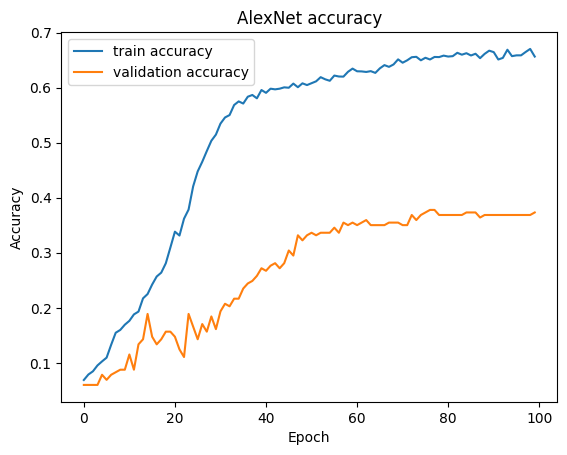

In [11]:
alex_net_wrapper.plot_accuracy()

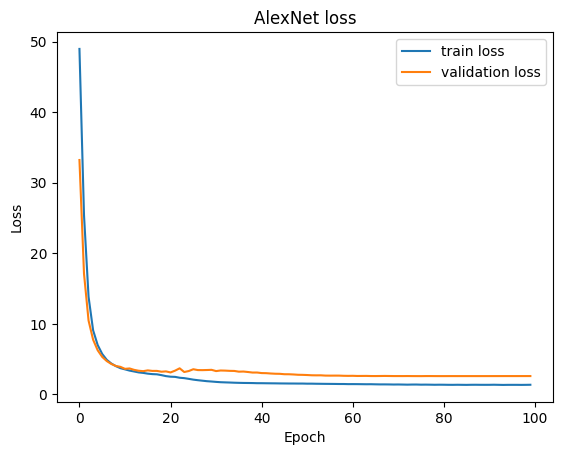

In [12]:
alex_net_wrapper.plot_loss()

20/20 [==============================] - 0s 9ms/step - loss: 2.7483 - accuracy: 0.3700
Loss: 2.7483
Accuracy: 0.3700
20/20 [==============================] - 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.22      0.29        23
           1       0.29      0.20      0.24        25
           2       0.55      0.58      0.56        52
           3       0.27      0.24      0.25        38
           4       0.41      0.41      0.41        27
           5       0.20      0.31      0.24        35
           6       0.39      0.27      0.32        45
           7       0.31      0.40      0.35        10
           8       0.43      0.25      0.32        12
           9       0.12      0.18      0.15        11
          10       0.35      0.30      0.33        23
          11       0.55      0.65      0.60        26
          12       0.27      0.34      0.30        32
          13       0.35      0.53      0.42       

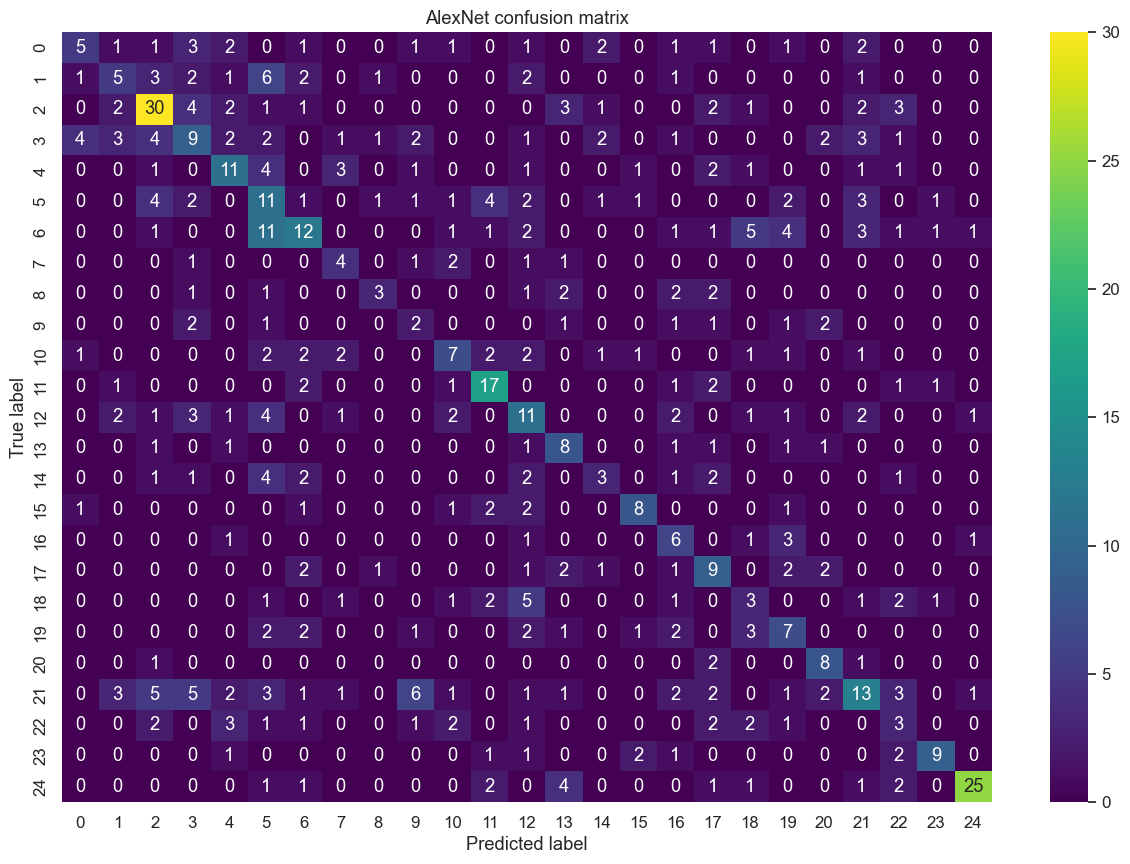

In [13]:
alex_net_wrapper.display_evaluation_results()